## Visualizing Filters of a Convolutional Neural Network

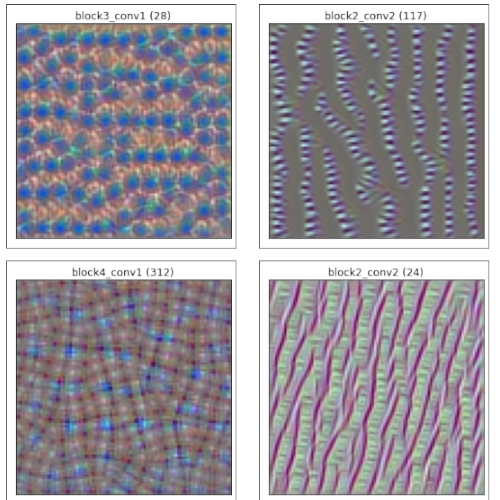

In [17]:
#!pip install --upgrade tensorflow-gpu

In [18]:
# https://pypi.python.org/pypi/libarchive
#!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!apt install libarchive-dev
!pip install python-libarchive


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libarchive-dev is already the newest version (3.6.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


## Task 2: Downloading the Model

In [19]:
import libarchive
import tensorflow as tf
import random
import matplotlib.pyplot as plt


In [20]:
model = tf.keras.applications.vgg16.VGG16(
    include_top = False, weights = "imagenet",
    input_shape=(96,96,3)
)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

## Task 3: Get Layer Output

In [21]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )
get_submodel('block1_conv2').summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Image Visualization

In [22]:
def create_image():
  return tf.random.uniform((96, 96, 3))
def plot_image(image, title = 'random'):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

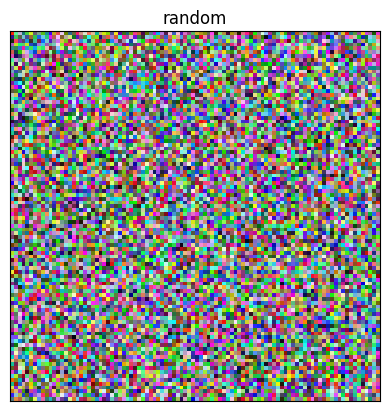

In [23]:
image = create_image()
plot_image(image)

## Task 5: Training Loop

In [24]:
def visualize_filter(layer_name, f_index = None, iters = 50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters - 1)
  assert num_filters > f_index, 'f_index is out of bounds'

  image = create_image()
  verbose_step = int(iters / 10)

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis = 0))[:, :, :, f_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads * 10

    if (i+1) % verbose_step == 0:
      print(f'Iteration: {i+1}, Loss: {loss.numpy():.4f}')

    plot_image(image, f'{layer_name}, {f_index}')

## Task 6: Final Results

In [25]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


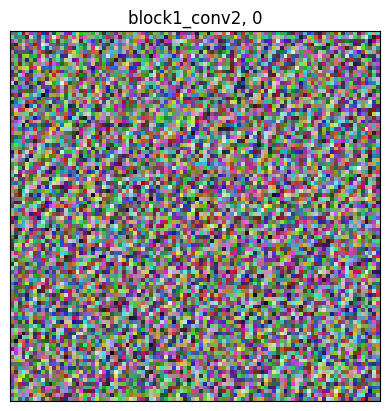

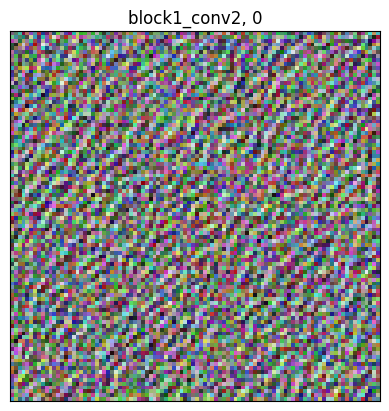

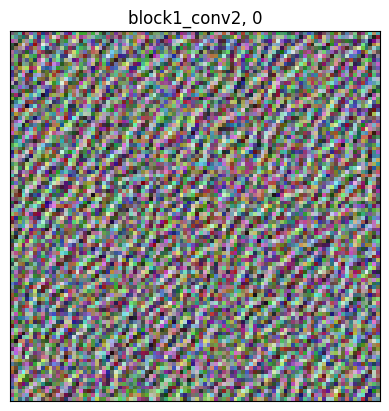

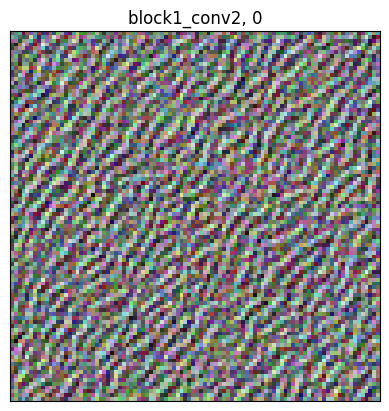

Iteration: 5, Loss: 4.9906


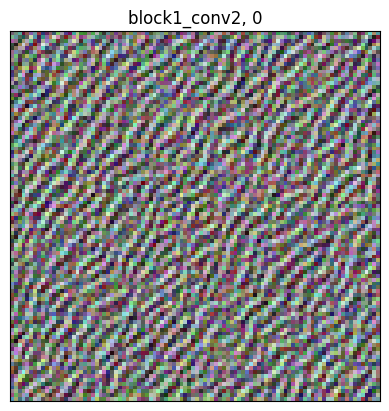

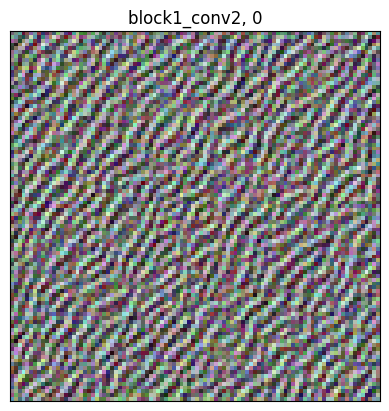

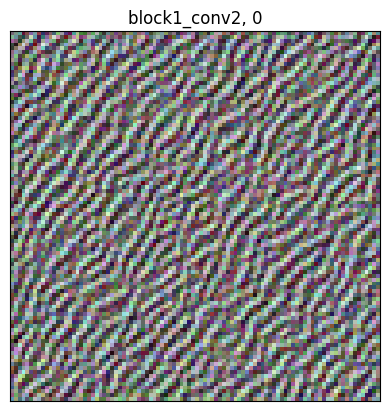

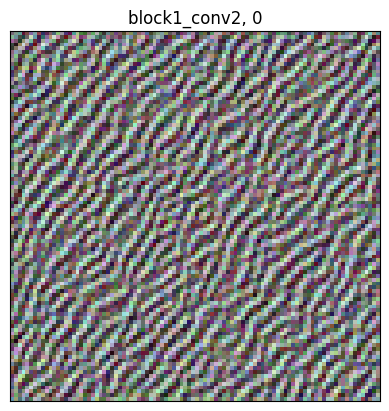

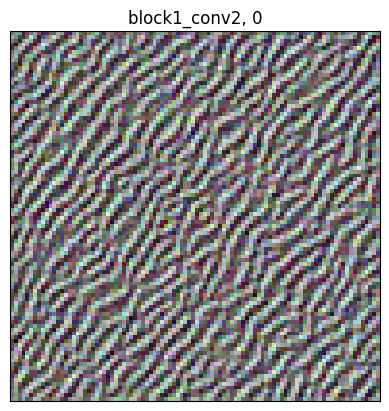

Iteration: 10, Loss: 8.4117


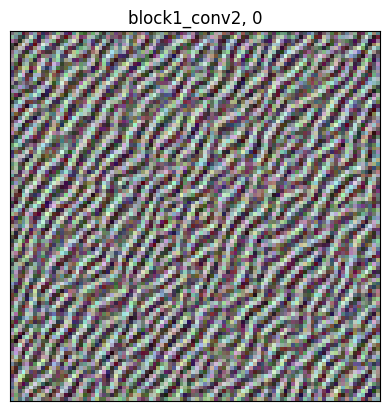

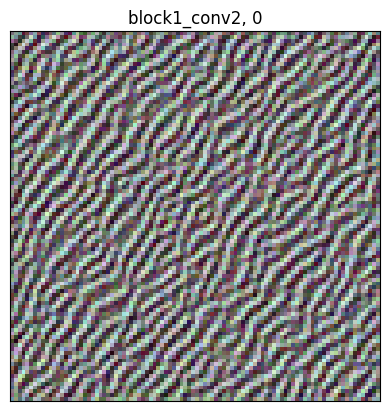

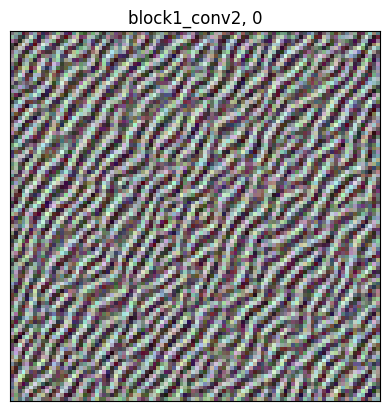

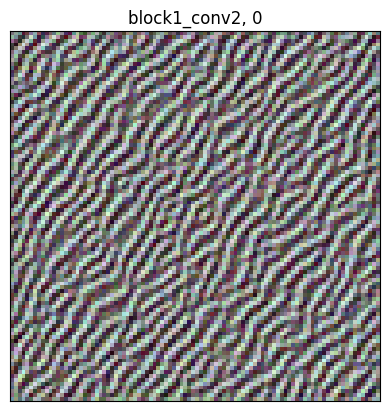

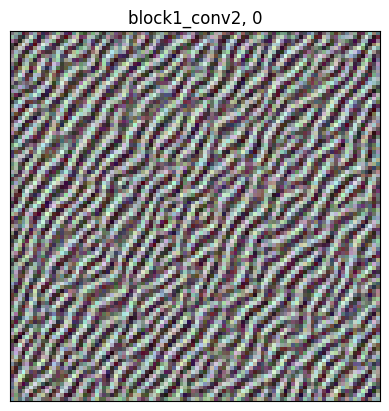

Iteration: 15, Loss: 11.8574


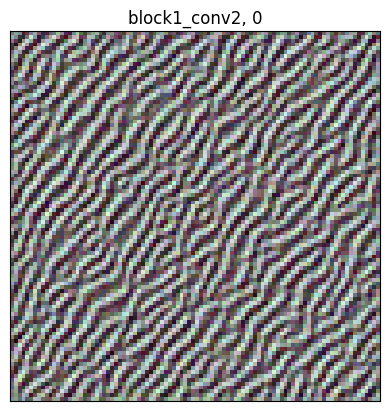

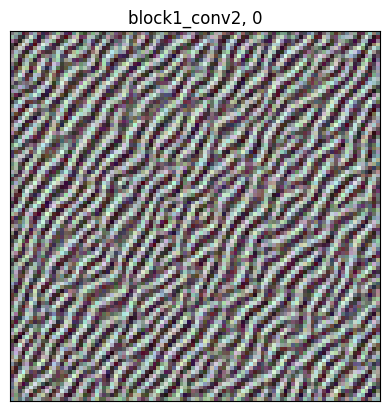

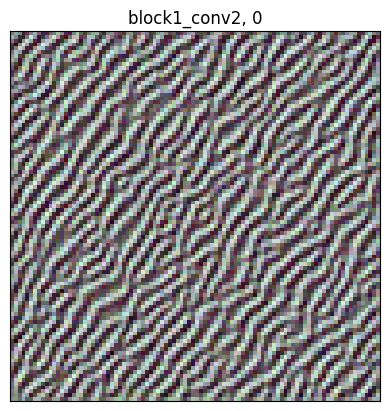

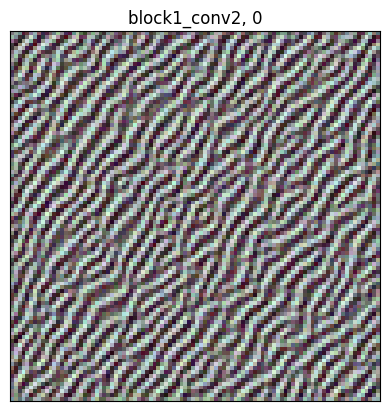

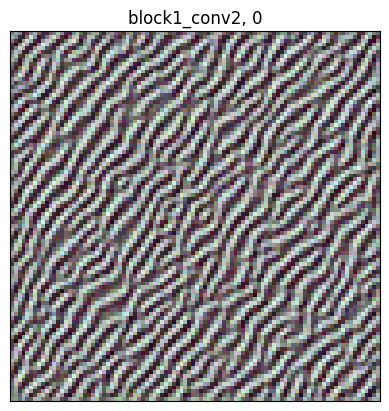

Iteration: 20, Loss: 15.3177


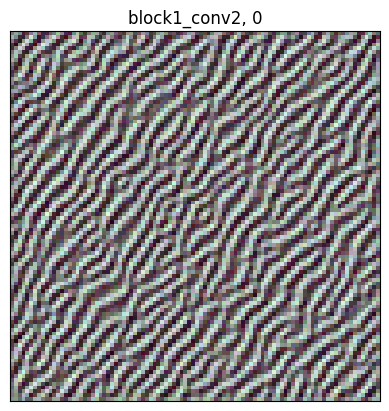

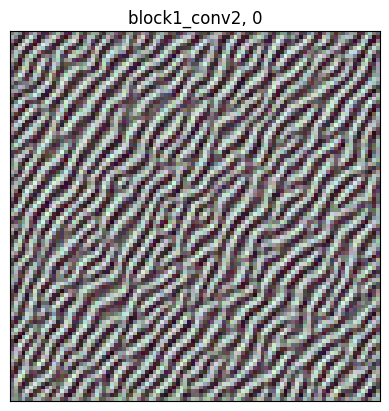

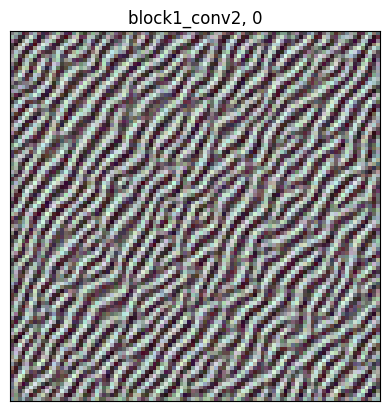

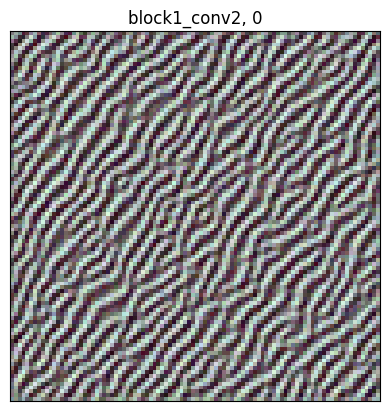

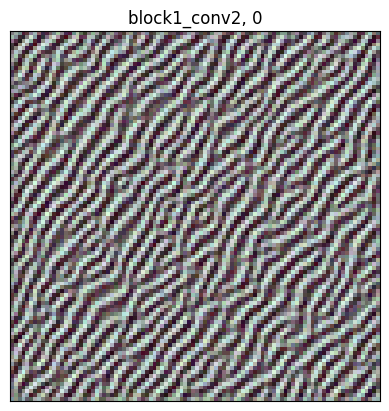

Iteration: 25, Loss: 18.7881


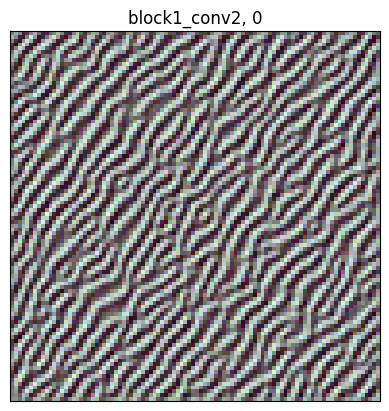

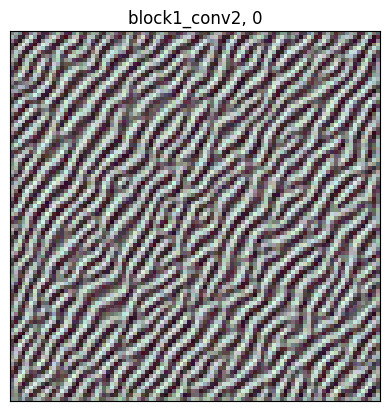

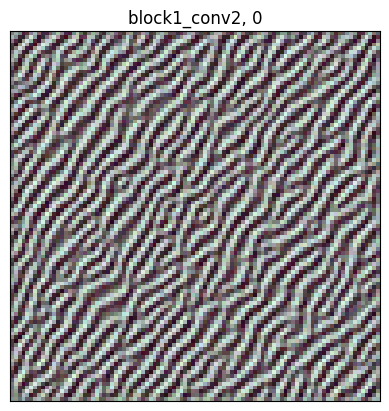

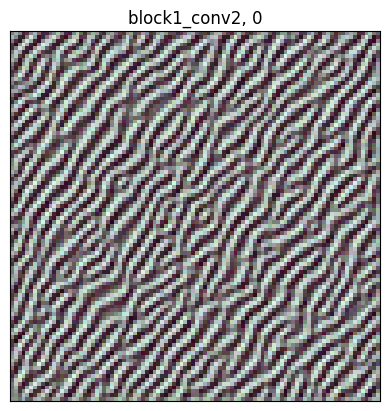

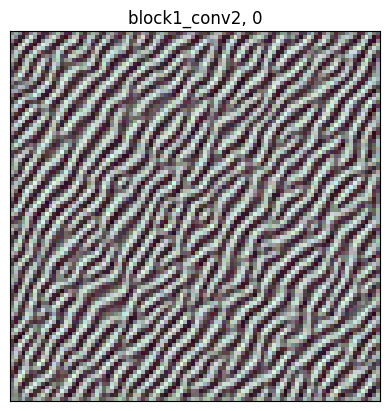

Iteration: 30, Loss: 22.2674


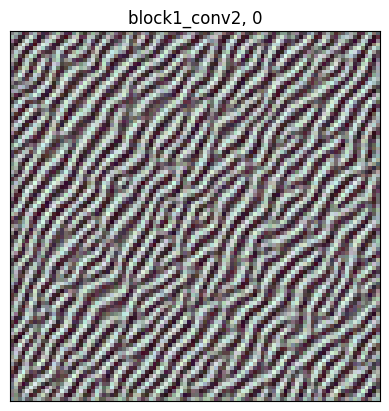

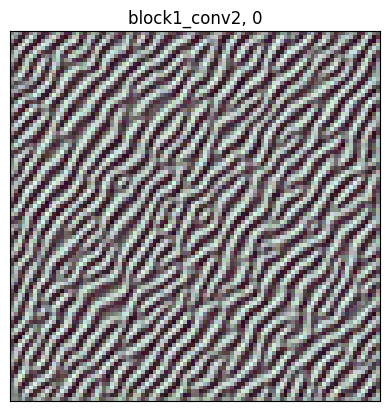

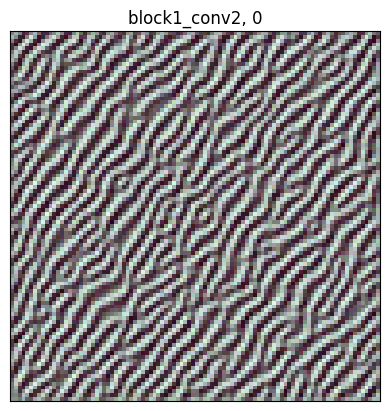

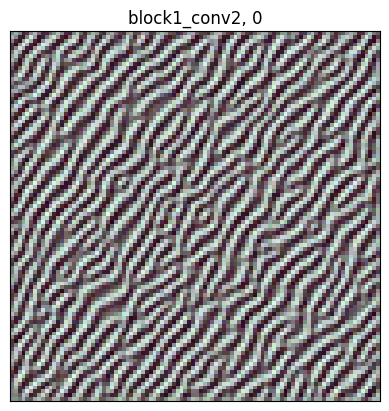

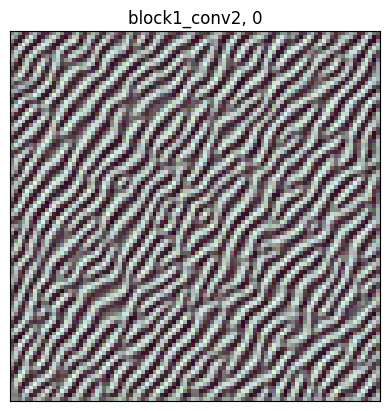

Iteration: 35, Loss: 25.7559


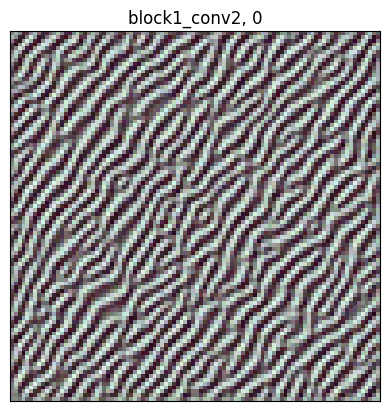

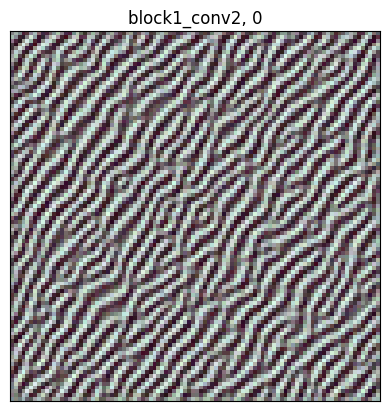

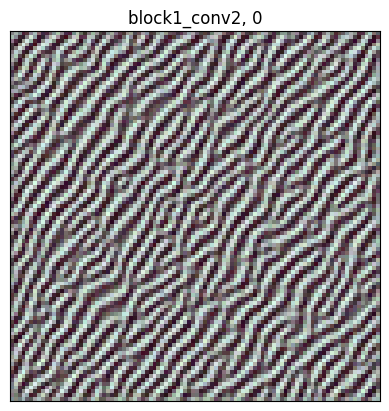

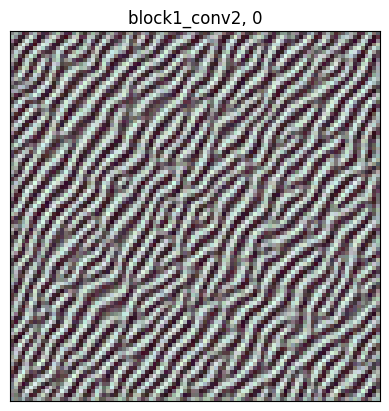

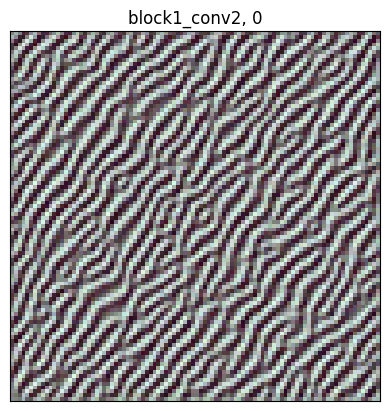

Iteration: 40, Loss: 29.2554


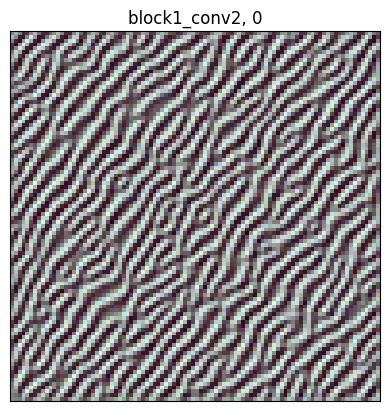

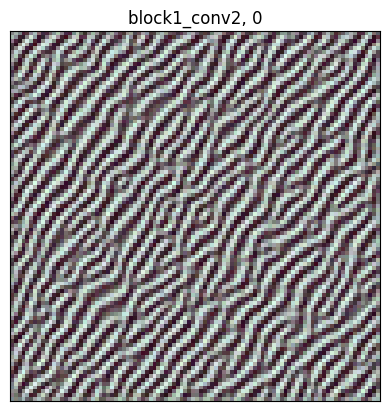

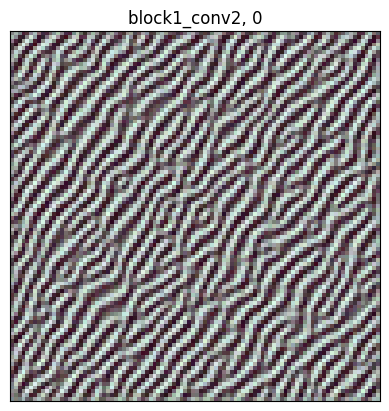

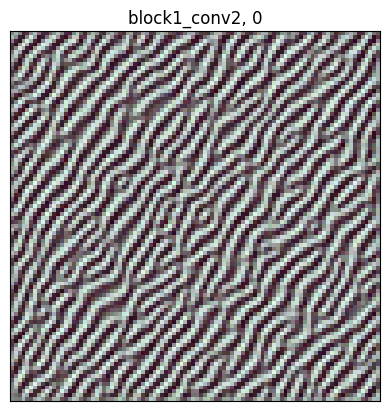

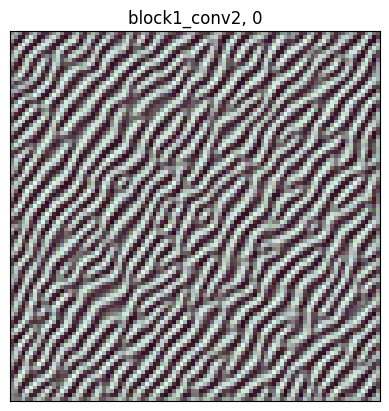

Iteration: 45, Loss: 32.7621


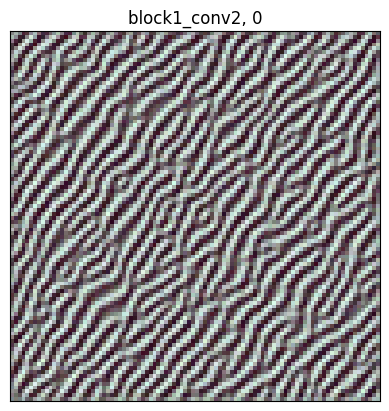

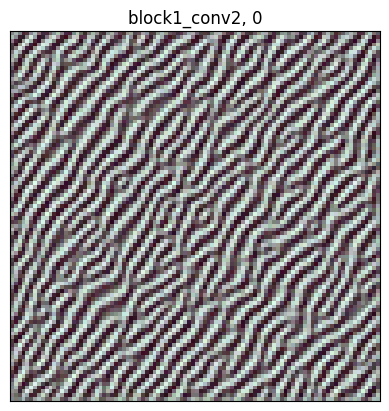

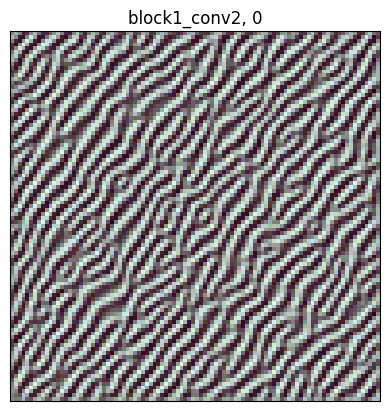

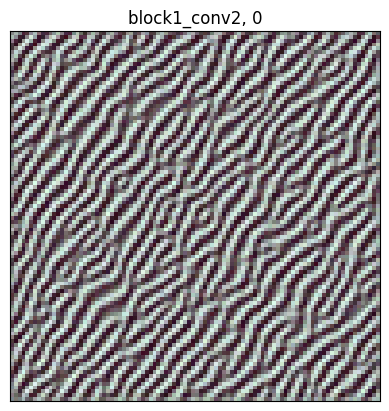

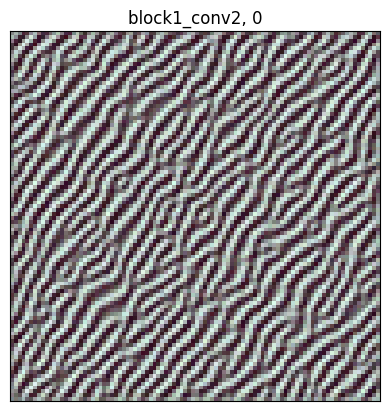

Iteration: 50, Loss: 36.2768


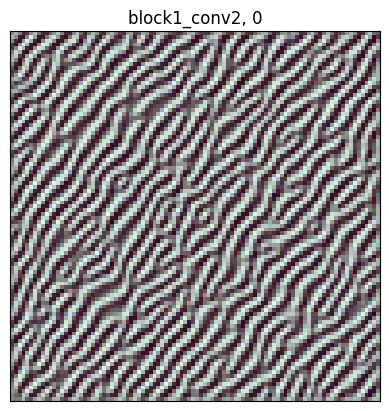

In [26]:
layer_name = 'block1_conv2' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name)